In [ ]:
MAX_SEQUENCE_LENGTH = 30 # max length of text (words) including padding
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 200 
GLOVE_DIR = "glove.twitter.27B.200d.pkl"

In [ ]:
import pandas as pd

In [ ]:
df.to_csv('data2.csv', index=False)

In [ ]:
df['sentiment']= df['sentiment'].replace(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],[1,2,1,0,2,1,1,1,3,1,2,1,4])

In [ ]:
["neutral", "happy", "sad", "hate","anger"]

In [ ]:
import numpy as np
import os, csv,pickle

In [ ]:
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Concatenate, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Model,load_model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Concatenate, Embedding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
texts, labels = [], []
print("[i] Reading from csv file...", end="")
with open('data.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        texts.append(row[0])
        labels.append(row[1])
print("Done!")

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from textblob import TextBlob
# set(stopwords.words('english'))  
stopwords=['a',
 'about',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'been',
 'being',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'nor',
 'o',
 'of',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves']

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
texts

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
    
ps = PorterStemmer()
corpus = []
for i in range(0, len(texts)):
    print(i)
    
    review = texts[i].split()
    
    review= [ word for word in review if not word.startswith('@') ]
    review = ' '.join(review)
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review= str(TextBlob(review).correct())
    print(type(review))
    review = word_tokenize(review)
    final=[]
    for word in review:
         if word.endswith("'t'"):
            word='not'
         if word in stopwords:
#             final.append(word)
            final.append(word)
         else:
#             final.append(ps.stem(word))
            final.append(wl.lemmatize(word,pos='v'))
    final = ' '.join(final)
    corpus.append(final)

In [ ]:
texts=corpus

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index

In [ ]:
data = pad_sequences(sequences, padding='post', maxlen=40)
labels = to_categorical(np.asarray(labels)) # convert to one-hot encoding vectors

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

In [ ]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

y_val.sum(axis=0)

In [ ]:
import pickle

with open(GLOVE_DIR, 'rb') as f:
    data = pickle.load(f)
    
data

# EMBEDDING LAYER

In [ ]:
embeddings_index = {}
for index,line in data.items():
    word = line[0]
    embeddings_index[index] = np.asarray(word, dtype='float32')

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [ ]:
model=Sequential()
model.add(Embedding(input_dim = len(word_index) + 1,
              output_dim = EMBEDDING_DIM,
              input_length = 40,
              weights = [embedding_matrix],
              trainable = False
             ))
model.add(Bidirectional(LSTM(100,return_sequences=True,dropout=0.0, recurrent_dropout=0.0))) # 1 lstm layer with 100 neurons
model.add(Bidirectional(LSTM(200,return_sequences=True,dropout=0.0, recurrent_dropout=0.0)))
model.add(Bidirectional(LSTM(200,dropout=0.3, recurrent_dropout=0.0)))
model.add(Dense(5, activation='softmax'))

In [ ]:
sequence_input =Input(shape=(40,), dtype='int32')
# static channel

# non-static channel
embedding_layer_train = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=40,
                            trainable=True)
embedded_sequences_train = embedding_layer_train(sequence_input)

In [ ]:
l_lstm1f = Bidirectional(LSTM(100,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(embedded_sequences_train)
l_lstm1t = Bidirectional(LSTM(200,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(l_lstm1f)

In [ ]:

l_c_lstm = Bidirectional(LSTM(200,dropout=0.3, recurrent_dropout=0.0))(l_lstm1t)

In [ ]:

preds = Dense(5, activation='softmax')(l_c_lstm)

In [ ]:
model = Model(sequence_input, preds)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.save('sentiment_analysis.h5')

In [ ]:
model = load_model("sentiment_analysis.h5")

In [ ]:
x_train

In [ ]:
model_log = model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=10, batch_size=128)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools, pickle

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

classes = ["neutral", "happy", "sad", "hate","anger"]

In [ ]:
Y_test = np.argmax(y_val, axis=1) # Convert one-hot to index
y_pred = model.predict(x_val)
y_pred_class = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(Y_test, y_pred_class)

In [ ]:
print(classification_report(Y_test, y_pred_class, target_names=classes))

In [ ]:
def plot_confusion_matrix(cm, labels,
                          normalize=True,
                          title='Confusion Matrix (Validation Set)',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, labels=classes)


In [ ]:
text = ["wants to hang out with friends soon",
        "I am sorry but I trust HRW I damned sight more than the PAP and it's cronies! Off course the PAP will say that they (HRW) made things up...despite of the fact that SG is a dictator state!?",
        "PAP are taking the piss again!",
        "Thought he sold his kidney to buy it; Instead, he bought a kidney then bought the car Filthy rich This is why we need communism",
        "Somebody needs to water Tharman's head, hair needs to be grown there",
        "what a nuisance fk. a proper clean and flat footpath,,now obstructed by sharedbikes..! which idiotic MP allowed this to happen?",
        "What baby bonus scheme ??? To grow up a kid in Singapore you think is easy now bo ??? Both parent need to work to grow up a kid until 21 , you think tats easy bo ??? Think la"
       ]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
sequences_test = tokenizer.texts_to_sequences(text)

data_test = pad_sequences(sequences_test, padding='post', maxlen=(40))
y_prob = model.predict(data_test)
for n, prediction in enumerate(y_prob):
    pred = y_prob.argmax(axis=-1)[n]
    print(text[n],"\nPrediction:",classes[pred],"\n")


In [ ]:
np.array(sequences_test[0])

In [ ]:
An input layer which receives the tokenized, padded sequences.
A Dropout layer.
Three LSTM layers with activation function ‘relu’.
A Dense layer with activation function ‘softmax’.
An Output Layer.

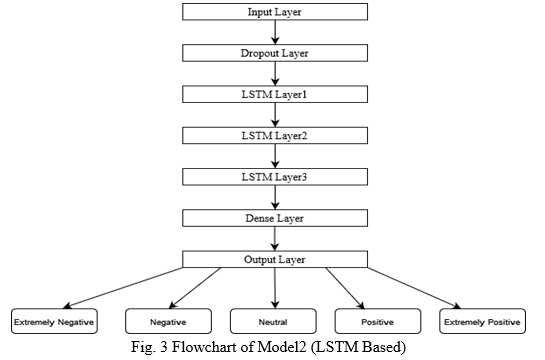